## Projekt 3 - vizualizacija

In [3]:
!pip install matplotlib
!pip install seaborn
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Učitavanje podataka
file_path = 'ocisceni_skup_podataka.csv'
data = pd.read_csv(file_path)

# Prikaz prvih nekoliko redaka podataka
print(data.head())
print(data.columns)


ModuleNotFoundError: No module named 'pandas'

### 1. Distribucija hotpointova po godinama - matplot

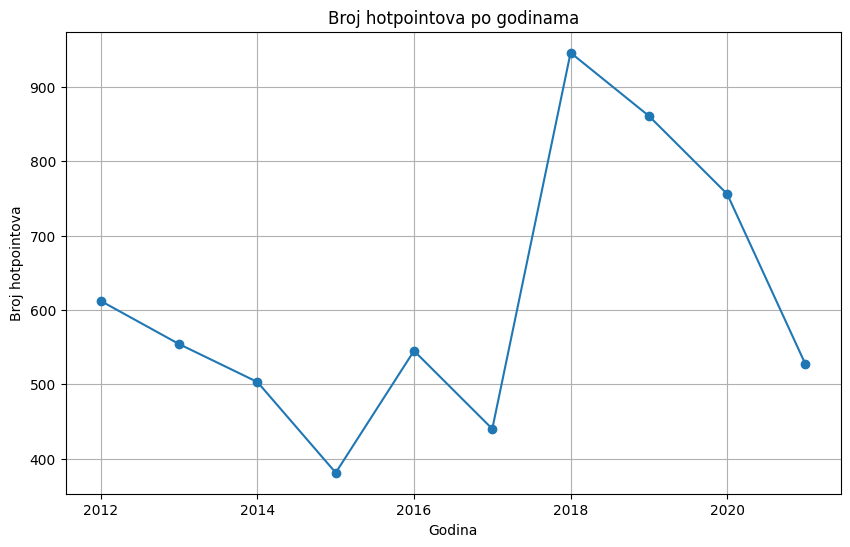

In [ ]:
# Dodavanje stupca godine
data['year'] = pd.to_datetime(data['acq_date']).dt.year

# Grupiranje po godinama
yearly_counts = data['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Broj hotpointova po godinama')
plt.xlabel('Godina')
plt.ylabel('Broj hotpointova')
plt.grid(True)
plt.show()

### 2. Geografska distribucija hotpointova - matplot


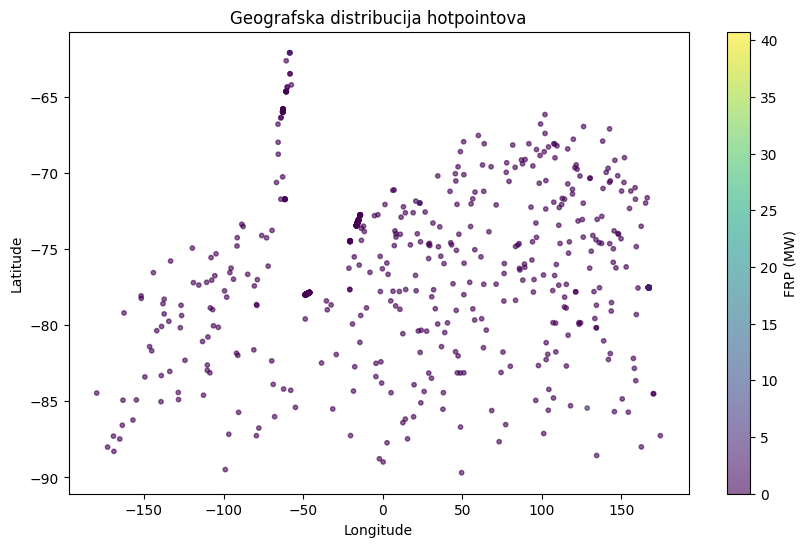

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['frp'], cmap='viridis', alpha=0.6, s=10)
plt.colorbar(label='FRP (MW)')
plt.title('Geografska distribucija hotpointova')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### 

### 3. Histogram za distribuciju FRP - matplot

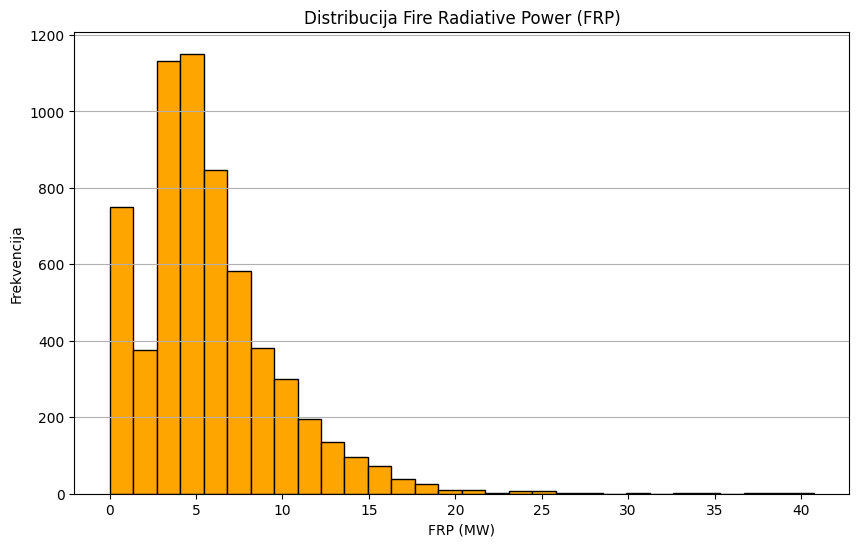

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['frp'], bins=30, color='orange', edgecolor='black')
plt.title('Distribucija Fire Radiative Power (FRP)')
plt.xlabel('FRP (MW)')
plt.ylabel('Frekvencija')
plt.grid(axis='y')
plt.show()

### 4. Horizontalni stupčani grafikon za broj detekcija po tipu

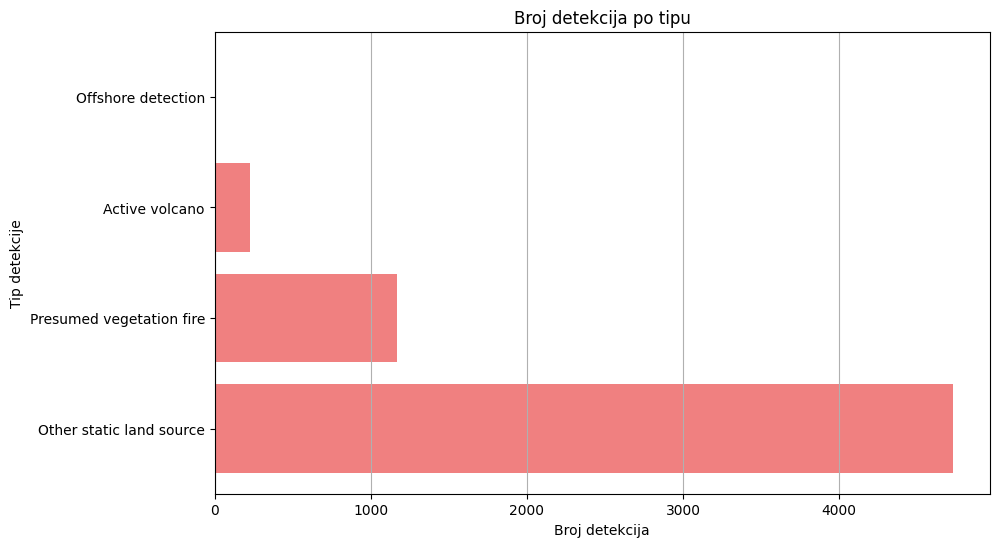

In [ ]:
# Brojanje detekcija po tipu
type_counts = data['type'].value_counts()

# Mapa koja prevodi numeričke vrijednosti tipa u opisne oznake
type_labels = {
    0: 'Presumed vegetation fire',
    1: 'Active volcano',
    2: 'Other static land source',
    3: 'Offshore detection'
}

# Zamjena numeričkih vrijednosti s opisnim oznakama
type_counts.index = type_counts.index.map(type_labels)

plt.figure(figsize=(10, 6))
plt.barh(type_counts.index, type_counts.values, color='lightcoral')
plt.title('Broj detekcija po tipu')
plt.xlabel('Broj detekcija')
plt.ylabel('Tip detekcije')
plt.grid(axis='x')
plt.show()


### 5. FRP (Fire Radiative Power) po satelitima - seaborn

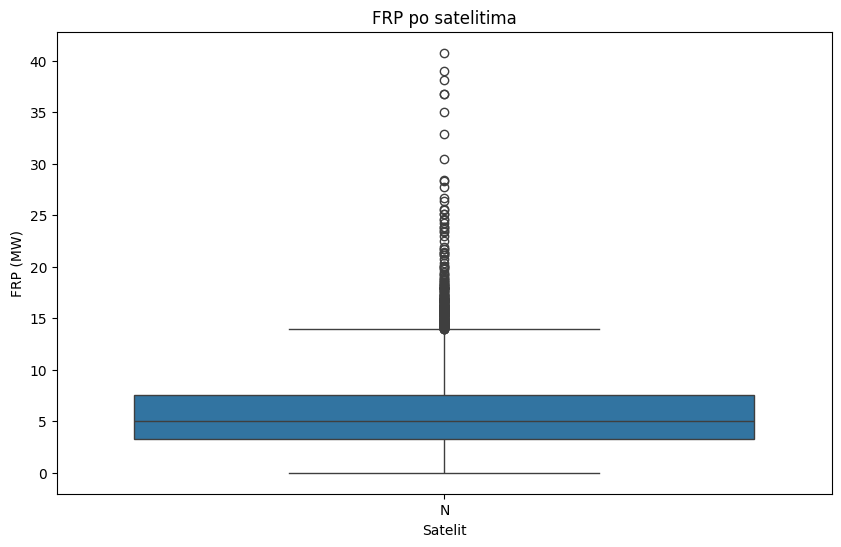

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='satellite', y='frp')
plt.title('FRP po satelitima')
plt.xlabel('Satelit')
plt.ylabel('FRP (MW)')
plt.show()

### 6. Distribucija brightness i bright_t31 temperatura - seaborn

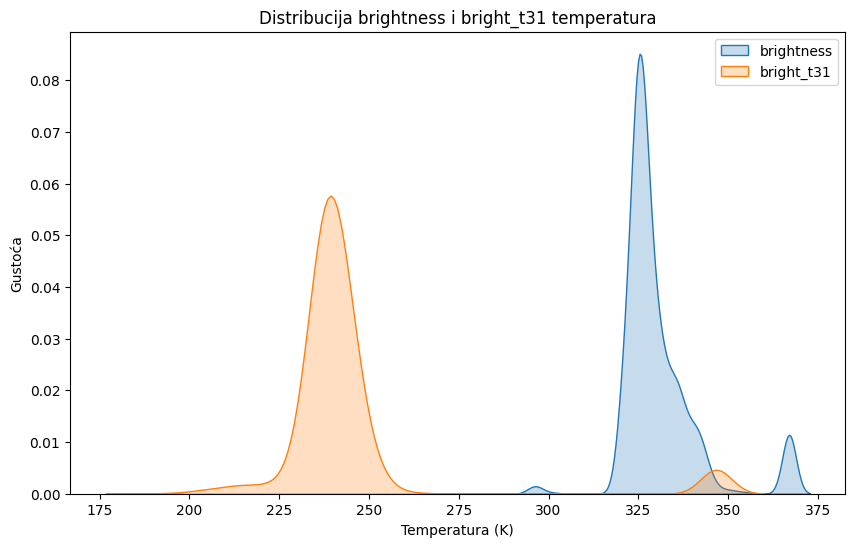

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='brightness', label='brightness', fill=True)
sns.kdeplot(data=data, x='bright_t31', label='bright_t31', fill=True)
plt.title('Distribucija brightness i bright_t31 temperatura')
plt.xlabel('Temperatura (K)')
plt.ylabel('Gustoća')
plt.legend()
plt.show()

### 7. Heatmap (Toplinska karta) za korelaciju između različitih varijabli - seaborn

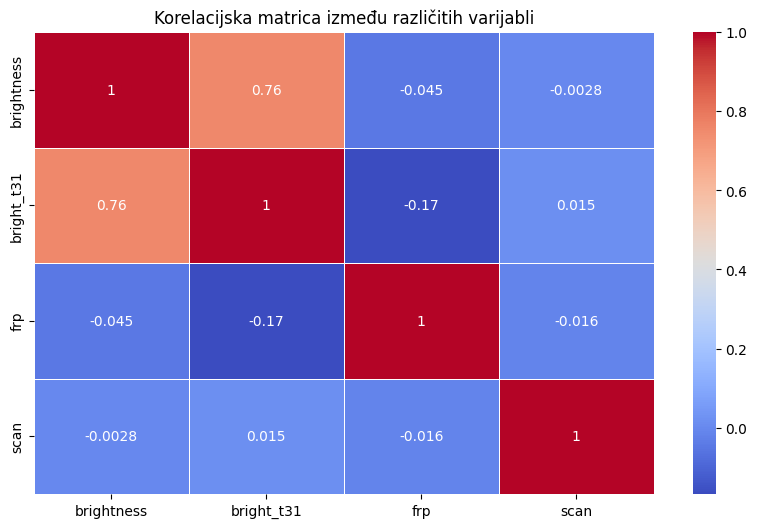

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = data[['brightness', 'bright_t31', 'frp', 'scan']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelacijska matrica između različitih varijabli')
plt.show()
